In [2]:
# Import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import glob
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', 100)
import sys
import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")

### Year 2012

Load the data and exclude non-useful columns

In [2]:
## Load data
field_2012 = pd.read_csv('Field Survey Data_Format 1_Soil Survey_2012-01-01_2012-12-31.csv')

In [ ]:
# Check columns
field_2012.columns.tolist()

In [3]:
# Columns to drop
drop_columns_2012 = ['pH Quality Last Modified', 'Bulk density Quality', 'Bulk density Quality Last Modified',
               'pH Quality', 'Total-N Quality', 'Total-N Quality Last Modified', 'Total-C Quality', 
                'Total-C Quality Last Modified', 'delta vs air - 15N', 'delta vs air - 15N Quality',
                'delta vs air - 15N Quality Last Modified', 'delta vs PDB - 13C', 'SOM Quality Last Modified',
                'delta vs PDB - 13C Quality', 'delta vs PDB - 13C Quality Last Modified', 'comments', 'SOM Quality',
                'Start_Sample_Date', 'GPS_Sample_Nr', 'Flume']

In [4]:
# Dictionary with names
dict_names_2012 = {'Bulk density (g/cm3)': 'BD_gcm3', 'SOM (% of DM)': 'OM_%w/w', 
              'Total-N (% of DM)': 'N_total_%w/w', 'Total-C (% of DM)': 'C_total_%w/w'}

In [5]:
# Drop columns
field_2012.drop(drop_columns_2012, axis = 1 , inplace = True)

In [6]:
# Aglimpse on the data
field_2012.head()

,Experiment_Id,SP_ID,sample_distance (m),Field,Sample_date,Sample_time,Easting,Northing,pH,Bulk density (g/cm3),SOM (% of DM),Total-N (% of DM),Total-C (% of DM)
0,FP003,1,50,Pecketsford,06/06/2012,12:00:00,265632,99300,5.18,0.916,10.1,0.51,4.742
1,FP003,2,50,Pecketsford,06/06/2012,12:00:00,265625,99275,5.23,0.943,10.4,0.55,4.980
2,FP003,7,50,Pecketsford,06/06/2012,12:00:00,265575,99225,5.54,0.948,11.8,0.64,5.610
3,FP003,9,50,Pecketsford,06/06/2012,12:00:00,265625,99225,5.12,0.857,10.9,0.54,4.510
4,FP003,17,50,Pecketsford,06/06/2012,12:00:00,265575,99175,5.68,0.946,11.5,0.59,5.340


In [7]:
# Rename columns
field_2012.rename(columns = dict_names_2012, inplace = True)

In [8]:
# Info
field_2012.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264 entries, 0 to 263
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Experiment_Id        264 non-null    object 
 1   SP_ID                264 non-null    int64  
 2   sample_distance (m)  264 non-null    int64  
 3   Field                264 non-null    object 
 4   Sample_date          264 non-null    object 
 5   Sample_time          264 non-null    object 
 6   Easting              264 non-null    int64  
 7   Northing             264 non-null    int64  
 8   pH                   264 non-null    float64
 9   BD_gcm3              264 non-null    float64
 10  OM_%w/w              264 non-null    float64
 11  N_total_%w/w         263 non-null    float64
 12  C_total_%w/w         263 non-null    float64
dtypes: float64(5), int64(4), object(4)
memory usage: 26.9+ KB


In [9]:
# Convert object to datetime
field_2012['Sample_date'] = pd.to_datetime(field_2012['Sample_date'])

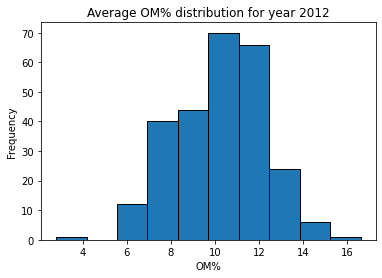

In [24]:
# Plot C% distribution
field_2012['OM_%w/w'].plot(kind = 'hist', ec = 'black')
plt.title('Average OM% distribution for year 2012')
plt.xlabel('OM%')
plt.ylabel('Frequency')
plt.show()

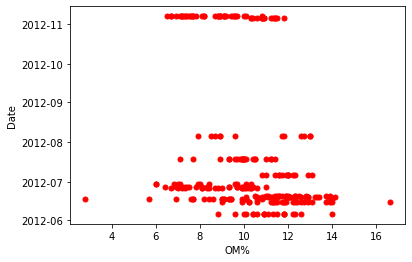

In [47]:
# Plot samples per date
plt.plot(field_2012['OM_%w/w'], field_2012['Sample_date'], 'o', color = 'red', markersize=5)
plt.xlabel('OM%')
plt.ylabel('Date')
plt.show()

Analyse the data, search for duplicates and NAs

In [14]:
# Check duplicates
bool_series = field_2012[['Easting', 'Northing']].duplicated()
print(bool_series.tolist())

[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False

In [15]:
# Check NAs in C%
field_2012['OM_%w/w'].isna().sum()

0

### Year 2013

In [16]:
## Load data
field_2013 = pd.read_csv('Field Survey Data_Format 1_Soil Survey_2013-01-01_2013-12-31.csv')

In [ ]:
# Check columns
field_2013.columns.tolist()

In [17]:
# Columns to drop
drop_columns_2013 = ['comments','pH Quality', 'pH Quality Last Modified', 'SOM Quality', 'SOM Quality Last Modified', 
                     'Total-N Quality', 'Total-N Quality Last Modified', 'Total-C Quality', 'Total-C Quality Last Modified',
                    'Flume', 'GPS_Sample_Nr', 'Start_Sample_Date']

In [18]:
# Dictionary with names
dict_names_2013 = {'SOM (% of DM)': 'OM_%w/w', 
                   'Total-N (% of DM)': 'N_total_%w/w', 'Total-C (% of DM)': 'C_total_%w/w'}

In [19]:
# Drop columns
field_2013.drop(drop_columns_2013, axis = 1 , inplace = True)

In [20]:
# Rename columns
field_2013.rename(columns = dict_names_2013, inplace = True)

In [21]:
field_2013.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 423 entries, 0 to 422
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Experiment_Id        423 non-null    object 
 1   SP_ID                423 non-null    int64  
 2   sample_distance (m)  423 non-null    int64  
 3   Field                423 non-null    object 
 4   Sample_date          423 non-null    object 
 5   Sample_time          423 non-null    object 
 6   Easting              423 non-null    int64  
 7   Northing             423 non-null    int64  
 8   pH                   423 non-null    float64
 9   OM_%w/w              89 non-null     float64
 10  N_total_%w/w         89 non-null     float64
 11  C_total_%w/w         89 non-null     float64
dtypes: float64(4), int64(4), object(4)
memory usage: 39.8+ KB


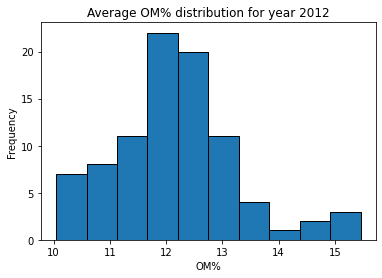

In [25]:
# Plot C% distribution
field_2013['OM_%w/w'].plot(kind = 'hist', ec = 'black')
plt.title('Average OM% distribution for year 2012')
plt.xlabel('OM%')
plt.ylabel('Frequency')
plt.show()

In [26]:
# Object to datetime
field_2013['Sample_date'] = pd.to_datetime(field_2013['Sample_date'])

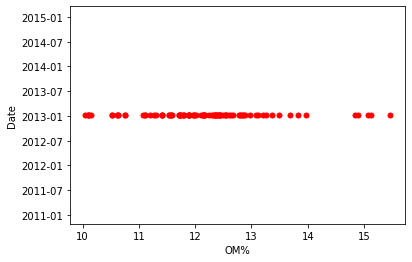

In [46]:
# Plot samples per date
plt.plot(field_2013['OM_%w/w'], field_2013['Sample_date'],'o', color = 'red', markersize=5)
plt.xlabel('OM%')
plt.ylabel('Date')
plt.show()

Analyse the data, search for duplicates and NAs

In [29]:
# Check duplicates
bool_series_13 = field_2013[['Sample_date', 'Easting', 'Northing']].duplicated()
print(bool_series_13.tolist())

[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False

In [30]:
# Check NAs in C%
field_2013['OM_%w/w'].isna().sum()

334

In [31]:
field_2013.shape

(423, 12)

In [32]:
field_2013.dropna(subset = 'OM_%w/w', inplace = True)

In [33]:
# Check NAs in C%
field_2013['OM_%w/w'].isna().sum()

0

### Year 2016

In [34]:
## Load data
field_2016 = pd.read_csv('Field Survey Data_Format 1_Soil Survey_2016-01-01_2016-12-31.csv')

In [ ]:
# Check columns
field_2016.columns

In [35]:
# Columns to keep
columns_to_keep = ['Experiment_Id','SP_ID','sample_distance (m)','Field','Sample_date','Sample_time', 
                   'Easting','Northing','pH','Bulk density (g/cm3)',
                   'SOM (% of DM)', 'Total-N (% of DM)', 'Total-C (% of DM)']

In [36]:
# Drop other columns
field_2016 = field_2016[columns_to_keep]

In [37]:
# A glimpse on the data
field_2016.head()

,Experiment_Id,SP_ID,sample_distance (m),Field,Sample_date,Sample_time,Easting,Northing,pH,Bulk density (g/cm3),SOM (% of DM),Total-N (% of DM),Total-C (% of DM)
0,FP059,1,50,Pecketsford,14/07/2016,16:24:00,265631.6521,99300.30838,5.60,0.56,12.9,0.525,5.390
1,FP059,2,50,Pecketsford,14/07/2016,16:20:00,265625.0000,99275.00000,5.41,0.70,10.6,0.446,4.280
2,FP059,7,50,Pecketsford,14/07/2016,16:09:00,265575.0000,99225.00000,5.49,1.06,9.7,0.404,3.667
3,FP059,9,50,Pecketsford,14/07/2016,16:15:00,265625.0000,99225.00000,5.28,1.05,10.2,0.424,4.100
4,FP059,17,50,Pecketsford,14/07/2016,16:04:00,265575.0000,99175.00000,5.51,1.05,10.0,0.403,3.885


In [38]:
# Dictionary with names
dict_names_2016 = {'Bulk density (g/cm3)':'BD_gcm3', 'SOM (% of DM)': 'OM_%w/w', 
                   'Total-N (% of DM)': 'N_total_%w/w', 'Total-C (% of DM)': 'C_total_%w/w'}

In [39]:
# Rename columns
field_2016.rename(columns = dict_names_2016, inplace = True)

In [40]:
# Info
field_2016.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396 entries, 0 to 395
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Experiment_Id        396 non-null    object 
 1   SP_ID                396 non-null    int64  
 2   sample_distance (m)  396 non-null    int64  
 3   Field                396 non-null    object 
 4   Sample_date          396 non-null    object 
 5   Sample_time          396 non-null    object 
 6   Easting              396 non-null    float64
 7   Northing             396 non-null    float64
 8   pH                   347 non-null    float64
 9   BD_gcm3              392 non-null    float64
 10  OM_%w/w              348 non-null    float64
 11  N_total_%w/w         348 non-null    float64
 12  C_total_%w/w         348 non-null    float64
dtypes: float64(7), int64(2), object(4)
memory usage: 40.3+ KB


In [41]:
# Convert object to datetime
field_2016['Sample_date'] = pd.to_datetime(field_2016['Sample_date'])

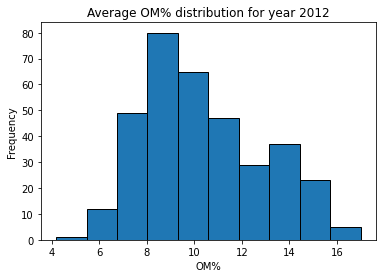

In [43]:
# Plot C% distribution
field_2016['OM_%w/w'].plot(kind = 'hist', ec = 'black')
plt.title('Average OM% distribution for year 2012')
plt.xlabel('OM%')
plt.ylabel('Frequency')
plt.show()

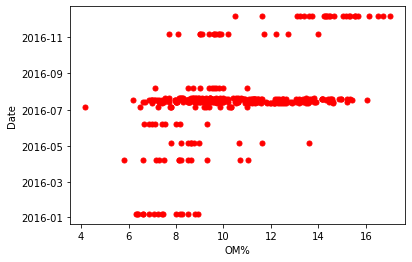

In [45]:
# Plot C% by date
plt.plot(field_2016['OM_%w/w'],field_2016['Sample_date'],  'o', color = 'red', markersize=5)
plt.xlabel('OM%')
plt.ylabel('Date')
plt.show()

Analyse the data, search for duplicates and NAs

In [48]:
# Check duplicates
bool_series_16 = field_2016[['Sample_date','Easting', 'Northing']].duplicated()
print(bool_series_16.tolist())

[False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False,

In [49]:
# Check NAs in C%
field_2016['OM_%w/w'].isna().sum()

48

In [50]:
field_2016.dropna(subset = 'OM_%w/w', inplace = True)

In [51]:
# Check NAs in C%
field_2016['OM_%w/w'].isna().sum()

0

### Year 2018

In [52]:
## Load data
field_2018 = pd.read_csv('Field Survey Data_Format 1_Soil Survey_2018-01-01_2018-12-31.csv')

In [ ]:
# Check columns
field_2018.columns

In [53]:
# Columns to keep
columns_to_keep2018 = ['Experiment_Id', 'SP_ID', 'sample_distance (m)', 'Field', 'Sample_date', 'Sample_time',
                       'Easting', 'Northing', 'pH','Conductivity (uS/cm)', 'Organic matter LOI (%w/w)', 'Total N (%w/w) Soil',
                      'Total C (%w/w) Soil']

In [54]:
# Keep the columns
field_2018 = field_2018[columns_to_keep2018]

In [55]:
# Dictionary with column names
dict_names_2018 = {'Conductivity (uS/cm)':'conductivity_uScm', 'Organic matter LOI (%w/w)': 'OM_%w/w', 
                   'Total N (%w/w) Soil': 'N_total_%w/w', 'Total C (%w/w) Soil': 'C_total_%w/w'}

In [56]:
# Rename columns
field_2018.rename(columns = dict_names_2018 , inplace = True)

In [57]:
# Info
field_2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Experiment_Id        294 non-null    object 
 1   SP_ID                294 non-null    int64  
 2   sample_distance (m)  0 non-null      float64
 3   Field                294 non-null    object 
 4   Sample_date          294 non-null    object 
 5   Sample_time          294 non-null    object 
 6   Easting              294 non-null    float64
 7   Northing             294 non-null    float64
 8   pH                   84 non-null     float64
 9   conductivity_uScm    80 non-null     float64
 10  OM_%w/w              84 non-null     float64
 11  N_total_%w/w         84 non-null     float64
 12  C_total_%w/w         84 non-null     float64
dtypes: float64(8), int64(1), object(4)
memory usage: 30.0+ KB


In [58]:
# Convert object to datetime
field_2018['Sample_date'] = pd.to_datetime(field_2018['Sample_date'])

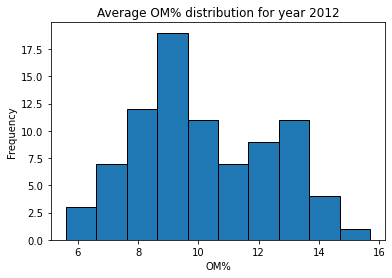

In [60]:
# Plot C% distribution
field_2018['OM_%w/w'].plot(kind = 'hist', ec = 'black')
plt.title('Average OM% distribution for year 2012')
plt.xlabel('OM%')
plt.ylabel('Frequency')
plt.show()

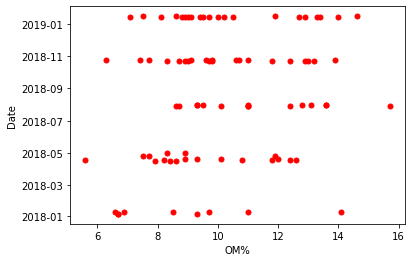

In [61]:
# Plot OM% by date
plt.plot(field_2018['OM_%w/w'],field_2018['Sample_date'],  'o', color = 'red', markersize=5)
plt.xlabel('OM%')
plt.ylabel('Date')
plt.show()

Analyse the data, search for duplicates and NAs

In [62]:
# Check duplicates
bool_series_18 = field_2018[['Sample_date','Easting', 'Northing']].duplicated()
print(bool_series_18.tolist())

[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False

In [64]:
# Check NAs in C%
field_2018['OM_%w/w'].isna().sum()

210

In [65]:
field_2018.shape

(294, 13)

In [66]:
field_2018.dropna(subset = 'OM_%w/w', inplace = True)

In [67]:
# Check NAs in C%
field_2018['OM_%w/w'].isna().sum()

0

### Year 2019

In [68]:
## Load data
field_2019 = pd.read_csv('Field Survey Data_Format 1_Soil Survey_2019-01-01_2019-12-31.csv')

In [ ]:
# Check columns
field_2019.columns.tolist()

In [70]:
# Columns to keep
columns_to_keep2019 = ['Experiment_Id', 'SP_ID', 'sample_distance (m)', 'Field', 'Sample_date', 'Sample_time',
                       'Easting', 'Northing', 'pH','Conductivity (uS/cm)', 'Organic matter LOI (%w/w)', 'Total N (%w/w) Soil',
                      'Total C (%w/w) Soil']

In [71]:
# Remobe other columns
field_2019 = field_2019[columns_to_keep2019]

In [72]:
# A glimpse on the dataset
field_2019.head()

,Experiment_Id,SP_ID,sample_distance (m),Field,Sample_date,Sample_time,Easting,Northing,pH,Conductivity (uS/cm),Organic matter LOI (%w/w),Total N (%w/w) Soil,Total C (%w/w) Soil
0,NW702-SP,19,NaN,Pecketsford,18/03/2019,12:01:00,265650.7,99239.591,NaN,NaN,NaN,NaN,NaN
1,NW702-SP,19,NaN,Pecketsford,18/03/2019,12:02:00,265576.3,99180.488,NaN,NaN,NaN,NaN,NaN
2,NW702-SP,19,NaN,Pecketsford,18/03/2019,12:03:00,265572.8,99122.300,NaN,NaN,NaN,NaN,NaN
3,NW702-SP,19,NaN,Pecketsford,18/03/2019,12:04:00,265617.2,99169.389,NaN,NaN,NaN,NaN,NaN
4,NW702-SP,19,NaN,Pecketsford,18/03/2019,12:05:00,265659.1,99203.655,NaN,NaN,NaN,NaN,NaN


In [73]:
# Dictionary with column names
dict_names_2019 = {'Conductivity (uS/cm)':'conductivity_uScm', 'Organic matter LOI (%w/w)': 'OM_%w/w', 
                   'Total N (%w/w) Soil': 'N_total_%w/w', 'Total C (%w/w) Soil': 'C_total_%w/w'}

In [74]:
# Rename columns
field_2019.rename(columns = dict_names_2019, inplace = True)

In [75]:
# Info
field_2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 403 entries, 0 to 402
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Experiment_Id        403 non-null    object 
 1   SP_ID                403 non-null    int64  
 2   sample_distance (m)  27 non-null     float64
 3   Field                403 non-null    object 
 4   Sample_date          403 non-null    object 
 5   Sample_time          403 non-null    object 
 6   Easting              403 non-null    float64
 7   Northing             403 non-null    float64
 8   pH                   166 non-null    float64
 9   conductivity_uScm    162 non-null    float64
 10  OM_%w/w              166 non-null    float64
 11  N_total_%w/w         166 non-null    float64
 12  C_total_%w/w         166 non-null    float64
dtypes: float64(8), int64(1), object(4)
memory usage: 41.1+ KB


In [76]:
# Convert object to datetime
field_2019['Sample_date'] = pd.to_datetime(field_2019['Sample_date'])

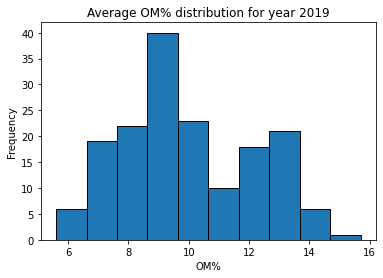

In [78]:
# Plot OM% distribution
field_2019['OM_%w/w'].plot(kind = 'hist', ec = 'black')
plt.title('Average OM% distribution for year 2019')
plt.xlabel('OM%')
plt.ylabel('Frequency')
plt.show()

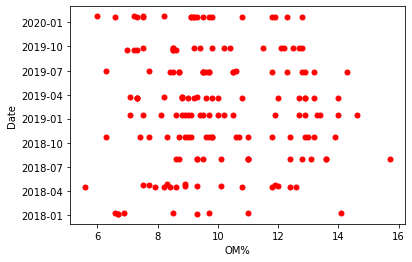

In [79]:
# Plot OM% by date
plt.plot(field_2019['OM_%w/w'],field_2019['Sample_date'],  'o', color = 'red', markersize=5)
plt.xlabel('OM%')
plt.ylabel('Date')
plt.show()

Analyse the data, search for duplicates and NAs

In [80]:
# Check duplicates
bool_series_19 = field_2019[['Sample_date','Easting', 'Northing']].duplicated()
print(bool_series_19.tolist())

[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False

In [81]:
# Check NAs in C%
field_2019['OM_%w/w'].isna().sum()

237

In [82]:
field_2019.shape

(403, 13)

In [83]:
field_2019.dropna(subset = 'OM_%w/w', inplace = True)

In [84]:
# Check NAs in C%
field_2019['OM_%w/w'].isna().sum()

0

### Year 2020

In [85]:
## Load data
field_2020 = pd.read_csv('Field Survey Data_Format 1_Soil Survey_2020-01-01_2020-12-31.csv')

In [ ]:
# Check the columns
field_2020.columns

In [86]:
# Columns to keep
columns_to_keep2020 = ['Experiment_Id', 'SP_ID', 'sample_distance (m)', 'Field', 'Sample_date', 'Sample_time',
                       'Easting', 'Northing', 'pH','Conductivity (uS/cm)', 'Organic matter LOI (%w/w)', 'Total N (%w/w) Soil',
                      'Total C (%w/w) Soil']

In [87]:
# Dictionary with names
dict_names_2020 = {'Conductivity (uS/cm)':'conductivity_uScm', 'Organic matter LOI (%w/w)': 'OM_%w/w', 
                   'Total N (%w/w) Soil': 'N_total_%w/w', 'Total C (%w/w) Soil': 'C_total_%w/w'}

In [88]:
# Remove other columns
field_2020 = field_2020[columns_to_keep2020]

In [89]:
# A glimpse on the dataset
field_2020.head()

,Experiment_Id,SP_ID,sample_distance (m),Field,Sample_date,Sample_time,Easting,Northing,pH,Conductivity (uS/cm),Organic matter LOI (%w/w),Total N (%w/w) Soil,Total C (%w/w) Soil
0,NW702-S,19,NaN,Pecketsford,18/03/2019,12:00:00,265618.86,99134.54,6.3,2047,9.2,0.412,4.24
1,NW702-S,68,NaN,Little Pecketsford,18/03/2019,12:00:00,265698.45,99004.41,6.0,2041,7.3,0.342,3.23
2,NW702-S,2002,NaN,Great Field,18/03/2019,12:00:00,265690.12,98829.40,6.0,2020,8.8,0.394,3.94
3,NW702-S,2004,NaN,Ware Park,19/03/2019,12:00:00,265791.65,98584.10,6.0,2025,7.3,0.322,3.12
4,NW702-S,2003,NaN,Poor Field,19/03/2019,12:00:00,265547.77,98594.88,6.1,2017,9.8,0.423,4.35


In [90]:
# Rename columns
field_2020.rename(columns = dict_names_2020, inplace = True)

In [91]:
# Info
field_2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142 entries, 0 to 141
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Experiment_Id        142 non-null    object 
 1   SP_ID                142 non-null    int64  
 2   sample_distance (m)  0 non-null      float64
 3   Field                142 non-null    object 
 4   Sample_date          142 non-null    object 
 5   Sample_time          142 non-null    object 
 6   Easting              142 non-null    float64
 7   Northing             142 non-null    float64
 8   pH                   142 non-null    float64
 9   conductivity_uScm    142 non-null    int64  
 10  OM_%w/w              142 non-null    float64
 11  N_total_%w/w         142 non-null    float64
 12  C_total_%w/w         142 non-null    float64
dtypes: float64(7), int64(2), object(4)
memory usage: 14.5+ KB


In [92]:
# Convert object to datetime
field_2020['Sample_date'] = pd.to_datetime(field_2020['Sample_date'])

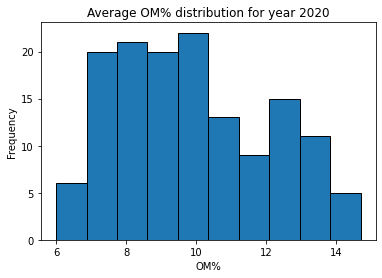

In [94]:
# Plot OM% distribution
field_2020['OM_%w/w'].plot(kind = 'hist', ec = 'black')
plt.title('Average OM% distribution for year 2020')
plt.xlabel('OM%')
plt.ylabel('Frequency')
plt.show()

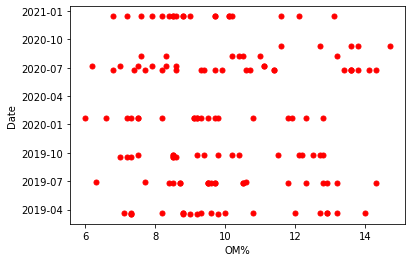

In [95]:
# Plot OM% by date
plt.plot(field_2020['OM_%w/w'],field_2020['Sample_date'],  'o', color = 'red', markersize=5)
plt.xlabel('OM%')
plt.ylabel('Date')
plt.show()

In [96]:
# Check duplicates
bool_series_20 = field_2020[['Sample_date','Easting', 'Northing']].duplicated()
print(bool_series_20.tolist())

[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False]


In [98]:
# Check NAs in C%
field_2020['C_total_%w/w'].isna().sum()

0

### Year 2021

In [99]:
## Load data
field_2021 = pd.read_csv('Field Survey Data_Format 1_Soil Survey_2021-01-01_2021-12-31.csv')

In [ ]:
# Check the columns
field_2021.columns

In [100]:
# Columns to keep
columns_to_keep2021 = ['Experiment_Id', 'SP_ID', 'sample_distance (m)', 'Field',  'Sample_date', 'Sample_time',
                       'Easting', 'Northing', 'pH','Conductivity (uS/cm)', 'Organic matter LOI (%w/w)', 'Total N (%w/w) Soil',
                      'Total C (%w/w) Soil']

In [101]:
# Dictionary with names
dict_names_2021 = {'Conductivity (uS/cm)':'conductivity_uScm', 'Organic matter LOI (%w/w)': 'OM_%w/w', 
                   'Total N (%w/w) Soil': 'N_total_%w/w', 'Total C (%w/w) Soil': 'C_total_%w/w'}

In [102]:
# Remove other columns
field_2021 = field_2021[columns_to_keep2021]

In [103]:
# A glimpse on the dataset
field_2021.head()

,Experiment_Id,SP_ID,sample_distance (m),Field,Sample_date,Sample_time,Easting,Northing,pH,Conductivity (uS/cm),Organic matter LOI (%w/w),Total N (%w/w) Soil,Total C (%w/w) Soil
0,NW752-2SP-1,2011,NaN,Higher Wyke Moor,03/09/2021,12:00:00,266114.792,97558.471,NaN,NaN,NaN,NaN,NaN
1,NW752-2SP-1,2012,NaN,Middle Wyke Moor,03/09/2021,12:00:00,266371.050,97681.779,NaN,NaN,NaN,NaN,NaN
2,NW752-2SP-1,2010,NaN,Lower Wyke Moor,14/09/2021,12:00:00,266432.495,97871.352,NaN,NaN,NaN,NaN,NaN
3,NW752-2SP-1,2013,NaN,Dairy South,14/09/2021,12:00:00,266062.963,98059.804,NaN,NaN,NaN,NaN,NaN
4,NW752-2SP-1,2016,NaN,Dairy East,13/09/2021,12:00:00,266285.532,98180.026,NaN,NaN,NaN,NaN,NaN


In [104]:
# Rename columns
field_2021.rename(columns = dict_names_2021, inplace = True)

In [105]:
# Convert object to datetime
field_2021['Sample_date'] = pd.to_datetime(field_2021['Sample_date'])

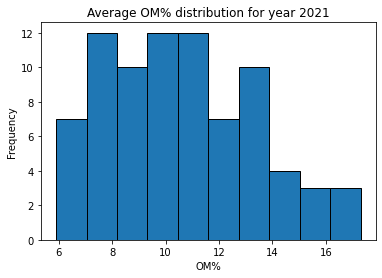

In [109]:
# Plot OM% distribution
field_2021['OM_%w/w'].plot(kind = 'hist', ec = 'black')
plt.title('Average OM% distribution for year 2021')
plt.xlabel('OM%')
plt.ylabel('Frequency')
plt.show()

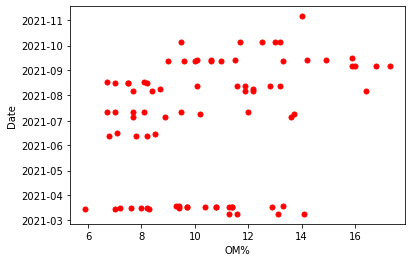

In [110]:
# Plot OM% by date
plt.plot(field_2021['OM_%w/w'],field_2021['Sample_date'],  'o', color = 'red', markersize=5)
plt.xlabel('OM%')
plt.ylabel('Date')
plt.show()

In [136]:
# Check duplicates
bool_series_21 = field_2021[['Sample_date','Easting', 'Northing']].duplicated()
print(bool_series_21.tolist())

[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False]


In [133]:
# Check NAs in C%
field_2021['OM_%w/w'].isna().sum()

126

In [134]:
field_2021.dropna(subset = 'OM_%w/w', inplace = True)

In [135]:
# Check NAs in C%
field_2021['OM_%w/w'].isna().sum()

0

### Joining all the datasets

In [138]:
# Create a list with 
list_df = [field_2012, field_2013, field_2016, field_2018, field_2019, field_2020, field_2021]
list_df

In [139]:
# Concatenate the list
result_df = pd.concat(list_df)

In [140]:
result_df.shape

(1173, 14)

In [141]:
result_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1173 entries, 0 to 205
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Experiment_Id        1173 non-null   object        
 1   SP_ID                1173 non-null   int64         
 2   sample_distance (m)  701 non-null    float64       
 3   Field                1173 non-null   object        
 4   Sample_date          1173 non-null   datetime64[ns]
 5   Sample_time          1173 non-null   object        
 6   Easting              1173 non-null   float64       
 7   Northing             1173 non-null   float64       
 8   pH                   1172 non-null   float64       
 9   BD_gcm3              608 non-null    float64       
 10  OM_%w/w              1173 non-null   float64       
 11  N_total_%w/w         1172 non-null   float64       
 12  C_total_%w/w         1172 non-null   float64       
 13  conductivity_uScm    464 non-null 

In [142]:
# A glimpse on the concatenated data
result_df.head()

,Experiment_Id,SP_ID,sample_distance (m),Field,Sample_date,Sample_time,Easting,Northing,pH,BD_gcm3,OM_%w/w,N_total_%w/w,C_total_%w/w,conductivity_uScm
0,FP003,1,50.0,Pecketsford,2012-06-06,12:00:00,265632.0,99300.0,5.18,0.916,10.1,0.51,4.742,NaN
1,FP003,2,50.0,Pecketsford,2012-06-06,12:00:00,265625.0,99275.0,5.23,0.943,10.4,0.55,4.980,NaN
2,FP003,7,50.0,Pecketsford,2012-06-06,12:00:00,265575.0,99225.0,5.54,0.948,11.8,0.64,5.610,NaN
3,FP003,9,50.0,Pecketsford,2012-06-06,12:00:00,265625.0,99225.0,5.12,0.857,10.9,0.54,4.510,NaN
4,FP003,17,50.0,Pecketsford,2012-06-06,12:00:00,265575.0,99175.0,5.68,0.946,11.5,0.59,5.340,NaN


In [143]:
# Check duplicates
result_df['duplicated'] = result_df[['Sample_date','Easting', 'Northing']].duplicated()

In [144]:
# A glimpse on the concatenated data
result_df.head()

,Experiment_Id,SP_ID,sample_distance (m),Field,Sample_date,Sample_time,Easting,Northing,pH,BD_gcm3,OM_%w/w,N_total_%w/w,C_total_%w/w,conductivity_uScm,duplicated
0,FP003,1,50.0,Pecketsford,2012-06-06,12:00:00,265632.0,99300.0,5.18,0.916,10.1,0.51,4.742,NaN,False
1,FP003,2,50.0,Pecketsford,2012-06-06,12:00:00,265625.0,99275.0,5.23,0.943,10.4,0.55,4.980,NaN,False
2,FP003,7,50.0,Pecketsford,2012-06-06,12:00:00,265575.0,99225.0,5.54,0.948,11.8,0.64,5.610,NaN,False
3,FP003,9,50.0,Pecketsford,2012-06-06,12:00:00,265625.0,99225.0,5.12,0.857,10.9,0.54,4.510,NaN,False
4,FP003,17,50.0,Pecketsford,2012-06-06,12:00:00,265575.0,99175.0,5.68,0.946,11.5,0.59,5.340,NaN,False


In [216]:
result_df.to_csv('results_with_duplicates.csv', index = False)

In [145]:
result_df_without_duplicates = result_df[result_df['duplicated'] == False].reset_index(drop = True)

In [146]:
result_df_without_duplicates

,Experiment_Id,SP_ID,sample_distance (m),Field,Sample_date,Sample_time,Easting,Northing,pH,BD_gcm3,OM_%w/w,N_total_%w/w,C_total_%w/w,conductivity_uScm,duplicated
0,FP003,1,50.0,Pecketsford,2012-06-06,12:00:00,265632.0000,99300.00000,5.18,0.916,10.1,0.510,4.742,NaN,False
1,FP003,2,50.0,Pecketsford,2012-06-06,12:00:00,265625.0000,99275.00000,5.23,0.943,10.4,0.550,4.980,NaN,False
2,FP003,7,50.0,Pecketsford,2012-06-06,12:00:00,265575.0000,99225.00000,5.54,0.948,11.8,0.640,5.610,NaN,False
3,FP003,9,50.0,Pecketsford,2012-06-06,12:00:00,265625.0000,99225.00000,5.12,0.857,10.9,0.540,4.510,NaN,False
4,FP003,17,50.0,Pecketsford,2012-06-06,12:00:00,265575.0000,99175.00000,5.68,0.946,11.5,0.590,5.340,NaN,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1001,NW752-3S,2009,NaN,Golden Rove,2021-08-12,12:00:00,265953.4417,97967.65381,5.80,NaN,11.6,0.549,5.240,2012.0,False
1002,NW752-3S,2007,NaN,Orchard Dean North,2021-08-12,12:00:00,265678.1911,98112.25632,5.90,NaN,13.2,0.629,5.970,2014.0,False
1003,NW752-3S,2008,NaN,Orchard Dean South,2021-08-12,12:00:00,265666.1468,98008.84146,5.80,NaN,11.9,0.580,5.370,2018.0,False
1004,NW752-3S,2017,NaN,Dairy North,2021-09-12,12:00:00,266282.1266,98358.20591,5.80,NaN,13.3,0.651,5.930,2015.0,False


In [147]:
result_df_without_duplicates.shape

(1006, 15)

In [148]:
# Info
result_df_without_duplicates.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1006 entries, 0 to 1005
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Experiment_Id        1006 non-null   object        
 1   SP_ID                1006 non-null   int64         
 2   sample_distance (m)  700 non-null    float64       
 3   Field                1006 non-null   object        
 4   Sample_date          1006 non-null   datetime64[ns]
 5   Sample_time          1006 non-null   object        
 6   Easting              1006 non-null   float64       
 7   Northing             1006 non-null   float64       
 8   pH                   1005 non-null   float64       
 9   BD_gcm3              607 non-null    float64       
 10  OM_%w/w              1006 non-null   float64       
 11  N_total_%w/w         1005 non-null   float64       
 12  C_total_%w/w         1005 non-null   float64       
 13  conductivity_uScm    302 non-null

In [149]:
result_df_without_duplicates.drop(columns = ['duplicated'], axis = 1, inplace = True)

In [150]:
# Count the numbers of NAs in C%
result_df_without_duplicates['C_total_%w/w'].isnull().sum()

1

In [151]:
# Count the numbers of NAs in OM%
result_df_without_duplicates['OM_%w/w'].isnull().sum()

0

In [152]:
#Drop Na
result_df_without_duplicates.dropna(subset = 'C_total_%w/w', inplace = True)

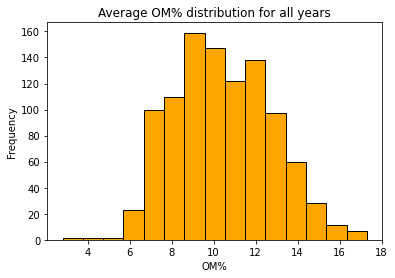

In [171]:
# Plot OM% distribution
result_df_without_duplicates['OM_%w/w'].plot(kind = 'hist', ec = 'black', bins = 15, color = 'orange')
plt.title('Average OM% distribution for all years')
plt.xlabel('OM%')
plt.ylabel('Frequency')
plt.show()

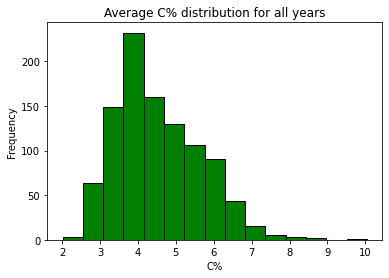

In [172]:
# Plot OM% distribution
result_df_without_duplicates['C_total_%w/w'].plot(kind = 'hist', ec = 'black', bins = 15, color = 'green')
plt.title('Average C% distribution for all years')
plt.xlabel('C%')
plt.ylabel('Frequency')
plt.show()

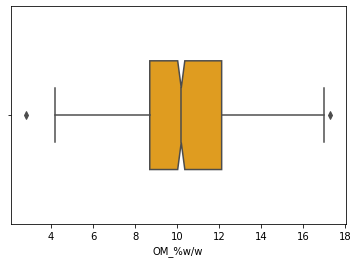

In [176]:
# Plot boxplot
sns.boxplot(result_df_without_duplicates['OM_%w/w'], notch = True, width=0.5, orient = 'h', color = 'orange')
plt.show()

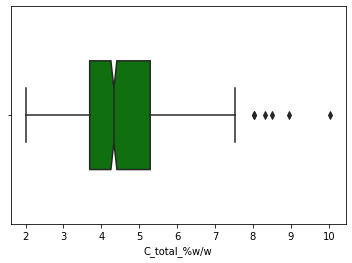

In [177]:
sns.boxplot(result_df_without_duplicates['C_total_%w/w'], notch = True, width=0.5, orient = 'h', color = 'green')
plt.show()

In [178]:
# Group by date and create summary statistics
summary_dat = result_df_without_duplicates.groupby(result_df_without_duplicates['Sample_date'].dt.year)['C_total_%w/w'].agg(['min', 'mean', 'median', 'max','std', 'count']).reset_index()

In [179]:
# A glimpse on the summary statistics
summary_dat

,Sample_date,min,mean,median,max,std,count
0,2012,2.690,4.616015,4.657,10.040,0.928946,263
1,2013,2.685,3.913382,3.891,5.165,0.464701,89
2,2016,2.011,4.575089,4.275,7.519,1.230368,347
3,2018,2.660,4.499365,4.280,7.350,1.096307,63
4,2019,2.840,4.529880,4.190,6.810,1.093772,83
5,2020,2.500,4.344000,4.165,6.840,1.047984,80
6,2021,2.760,4.845125,4.655,8.940,1.483824,80


In [260]:
# Save to csv
summary_dat.to_csv('summary_stats_per_year.csv', index = False)

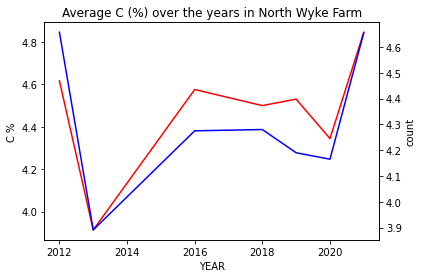

In [180]:
# Plot mean and count per year
fig, ax = plt.subplots()

ax.plot(summary_dat['Sample_date'], summary_dat['mean'], color = 'red')
plt.xlabel('YEAR')
plt.ylabel('C %')

ax2 = ax.twinx()
ax2.plot(summary_dat['Sample_date'], summary_dat['median'], color = 'blue')
plt.ylabel('count')


plt.title('Average C (%) over the years in North Wyke Farm')
plt.show()

In [181]:
# Group by Sample_date and count
group_date = result_df_without_duplicates[['Sample_date', 'C_total_%w/w']].groupby(['Sample_date']).count().reset_index()

In [182]:
# Group by location_date and count
group_loc = result_df_without_duplicates[['Easting','Northing', 'C_total_%w/w']].groupby(['Easting','Northing']).count().reset_index()

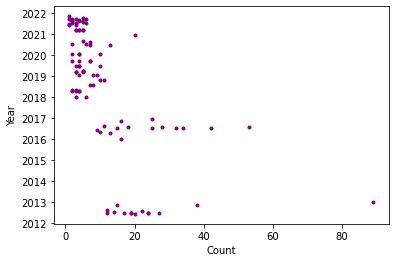

In [189]:
# Plot the count of samples per date
plt.plot(group_date['C_total_%w/w'], group_date['Sample_date'], 'o', color = 'purple', markersize = 3)
plt.xlabel('Count')
plt.ylabel('Year')
plt.show()

In [265]:
# Save to csv
group_date.to_csv('number_samples_per_date.csv')

In [191]:
# Create a new column: MM-YYYYa
month_df = result_df_without_duplicates['Sample_date'].dt.to_period('M')
year_df = result_df_without_duplicates['Sample_date'].dt.to_period('Y')

In [192]:
result_df_without_duplicates.insert(5, 'Month-Year', month_df)
result_df_without_duplicates.insert(6, 'Year', year_df)

In [193]:
result_df_without_duplicates

,Experiment_Id,SP_ID,sample_distance (m),Field,Sample_date,Month-Year,Year,Sample_time,Easting,Northing,pH,BD_gcm3,OM_%w/w,N_total_%w/w,C_total_%w/w,conductivity_uScm
0,FP003,1,50.0,Pecketsford,2012-06-06,2012-06,2012,12:00:00,265632.0000,99300.00000,5.18,0.916,10.1,0.510,4.742,NaN
1,FP003,2,50.0,Pecketsford,2012-06-06,2012-06,2012,12:00:00,265625.0000,99275.00000,5.23,0.943,10.4,0.550,4.980,NaN
2,FP003,7,50.0,Pecketsford,2012-06-06,2012-06,2012,12:00:00,265575.0000,99225.00000,5.54,0.948,11.8,0.640,5.610,NaN
3,FP003,9,50.0,Pecketsford,2012-06-06,2012-06,2012,12:00:00,265625.0000,99225.00000,5.12,0.857,10.9,0.540,4.510,NaN
4,FP003,17,50.0,Pecketsford,2012-06-06,2012-06,2012,12:00:00,265575.0000,99175.00000,5.68,0.946,11.5,0.590,5.340,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1001,NW752-3S,2009,NaN,Golden Rove,2021-08-12,2021-08,2021,12:00:00,265953.4417,97967.65381,5.80,NaN,11.6,0.549,5.240,2012.0
1002,NW752-3S,2007,NaN,Orchard Dean North,2021-08-12,2021-08,2021,12:00:00,265678.1911,98112.25632,5.90,NaN,13.2,0.629,5.970,2014.0
1003,NW752-3S,2008,NaN,Orchard Dean South,2021-08-12,2021-08,2021,12:00:00,265666.1468,98008.84146,5.80,NaN,11.9,0.580,5.370,2018.0
1004,NW752-3S,2017,NaN,Dairy North,2021-09-12,2021-09,2021,12:00:00,266282.1266,98358.20591,5.80,NaN,13.3,0.651,5.930,2015.0


In [196]:
result_df_without_duplicates.to_csv('dataset_final_RR.csv', index = False)

### Open files from computer

In [116]:
files_df = pd.read_csv('dataset_final_date_RR.csv', sep =';')
XY = files_df[['X', 'Y']]

In [122]:
## To open files from computer
files = glob.glob('field_*csv')
files_df = pd.concat([pd.read_csv(f, sep=';') for f in files], axis = 0)
files_df.insert(8,'X', XY['X'])
files_df.insert(9,'Y', XY['Y'])
files_df

,Experiment_Id,SP_ID,sample_distance (m),Field,Sample_date,Sample_time,Easting,Northing,X,Y,pH,BD_gcm3,OM_%w/w,N_total_%w/w,C_total_%w/w,conductivity_uScm
0,FP003,1,50.0,Pecketsford,6/6/2012,12:00:00,265632.0000,99300.00000,-3.907212,50.777660,5.18,0.916,10.1,0.510,4.742,NaN
1,FP003,2,50.0,Pecketsford,6/6/2012,12:00:00,265625.0000,99275.00000,-3.907302,50.777434,5.23,0.943,10.4,0.550,4.980,NaN
2,FP003,7,50.0,Pecketsford,6/6/2012,12:00:00,265575.0000,99225.00000,-3.907992,50.776973,5.54,0.948,11.8,0.640,5.610,NaN
3,FP003,9,50.0,Pecketsford,6/6/2012,12:00:00,265625.0000,99225.00000,-3.907283,50.776985,5.12,0.857,10.9,0.540,4.510,NaN
4,FP003,17,50.0,Pecketsford,6/6/2012,12:00:00,265575.0000,99175.00000,-3.907974,50.776524,5.68,0.946,11.5,0.590,5.340,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,NW752-1S,2012,NaN,Middle Wyke Moor,6/10/2021,12:00:00,266286.9323,97739.51404,-3.906845,50.766200,5.70,NaN,13.2,0.608,6.450,2012.0
76,NW752-1S,2010,NaN,Lower Wyke Moor,6/10/2021,12:00:00,266451.1332,97788.73835,-3.906136,50.766211,5.80,NaN,11.7,0.521,5.480,2014.0
77,NW752-1S,2019,NaN,Longlands North,6/10/2021,12:00:00,265884.6342,98794.41491,-3.905427,50.766223,5.90,NaN,9.5,0.446,4.340,2018.0
78,NW752-1S,2018,NaN,Longlands South,6/10/2021,12:00:00,265920.9621,98603.80501,-3.904719,50.766234,5.50,NaN,13.0,0.635,6.160,2015.0


In [123]:
files_df['Sample_date'].dtype

dtype('O')

In [124]:
files_df['Sample_date'] = pd.to_datetime(files_df['Sample_date'])

In [125]:
# Create a new column: MM-YYYYa
month_df = files_df['Sample_date'].dt.to_period('M')
year_df = files_df['Sample_date'].dt.to_period('Y')

In [126]:
files_df.insert(5, 'Month-year', month_df)
files_df.insert(6, 'Year', year_df)
files_df

,Experiment_Id,SP_ID,sample_distance (m),Field,Sample_date,Month-year,Year,Sample_time,Easting,Northing,X,Y,pH,BD_gcm3,OM_%w/w,N_total_%w/w,C_total_%w/w,conductivity_uScm
0,FP003,1,50.0,Pecketsford,2012-06-06,2012-06,2012,12:00:00,265632.0000,99300.00000,-3.907212,50.777660,5.18,0.916,10.1,0.510,4.742,NaN
1,FP003,2,50.0,Pecketsford,2012-06-06,2012-06,2012,12:00:00,265625.0000,99275.00000,-3.907302,50.777434,5.23,0.943,10.4,0.550,4.980,NaN
2,FP003,7,50.0,Pecketsford,2012-06-06,2012-06,2012,12:00:00,265575.0000,99225.00000,-3.907992,50.776973,5.54,0.948,11.8,0.640,5.610,NaN
3,FP003,9,50.0,Pecketsford,2012-06-06,2012-06,2012,12:00:00,265625.0000,99225.00000,-3.907283,50.776985,5.12,0.857,10.9,0.540,4.510,NaN
4,FP003,17,50.0,Pecketsford,2012-06-06,2012-06,2012,12:00:00,265575.0000,99175.00000,-3.907974,50.776524,5.68,0.946,11.5,0.590,5.340,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,NW752-1S,2012,NaN,Middle Wyke Moor,2021-06-10,2021-06,2021,12:00:00,266286.9323,97739.51404,-3.906845,50.766200,5.70,NaN,13.2,0.608,6.450,2012.0
76,NW752-1S,2010,NaN,Lower Wyke Moor,2021-06-10,2021-06,2021,12:00:00,266451.1332,97788.73835,-3.906136,50.766211,5.80,NaN,11.7,0.521,5.480,2014.0
77,NW752-1S,2019,NaN,Longlands North,2021-06-10,2021-06,2021,12:00:00,265884.6342,98794.41491,-3.905427,50.766223,5.90,NaN,9.5,0.446,4.340,2018.0
78,NW752-1S,2018,NaN,Longlands South,2021-06-10,2021-06,2021,12:00:00,265920.9621,98603.80501,-3.904719,50.766234,5.50,NaN,13.0,0.635,6.160,2015.0


In [127]:
group_by_month = pd.DataFrame(files_df[['Month-year', 'C_total_%w/w']].groupby(['Month-year']).agg(['count', 'mean', 'median', 'std']).reset_index())
group_by_month.columns = group_by_month.columns.to_flat_index()
group_by_month.rename(columns = {('Month-year', ''): 'Month-year', ('C_total_%w/w', 'count'): 'count',
                               ('C_total_%w/w', 'mean'): 'mean', ('C_total_%w/w', 'median'): 'median',
                               ('C_total_%w/w', 'std'): 'std'}, 
                               inplace = True)

group_by_month['Month-year'] = group_by_month['Month-year'].astype('datetime64[ns]')
group_by_month

,Month-year,count,mean,median,std
0,2012-06-01,203,4.798167,4.870,0.894707
1,2012-07-01,60,3.999733,3.971,0.768726
2,2013-06-01,89,3.913382,3.891,0.464701
3,2016-07-01,347,4.575089,4.275,1.230368
4,2018-04-01,18,4.188889,4.060,0.809632
5,2018-05-01,3,3.340000,2.830,0.980153
6,2018-07-01,15,5.169333,4.960,1.037858
7,2018-08-01,6,4.253333,3.925,1.657717
8,2018-10-01,21,4.522857,4.280,0.993902
9,2019-01-01,21,4.596190,4.180,1.126244


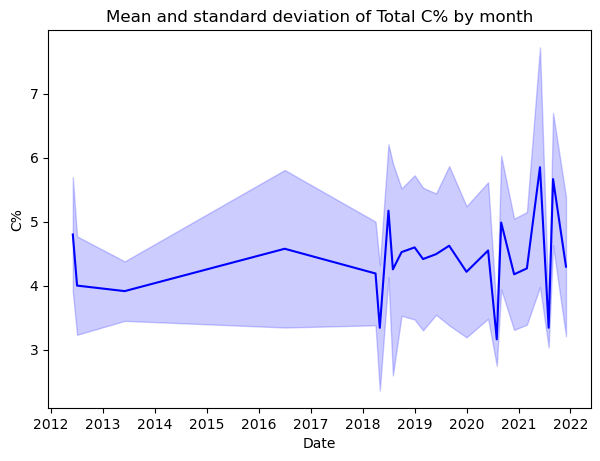

In [128]:
## Plot
plt.figure(figsize=(7, 5), dpi=100)
plt.plot(group_by_month['Month-year'], group_by_month['mean'], color = 'blue')
plt.fill_between(group_by_month['Month-year'], (group_by_month['mean']+group_by_month['std']), 
                 (group_by_month['mean']-group_by_month['std']), alpha = 0.2, color = 'blue')
plt.title("Mean and standard deviation of Total C% by month")
plt.xlabel("Date")
plt.ylabel("C%")
plt.savefig('average_C_by_month_sd.png', dpi=300)

plt.show()

In [129]:
# Group by year and count
group_year = files_df[['Year', 'C_total_%w/w']].groupby(['Year']).agg(['min', 'mean', 'median', 'max','std', 'count']).reset_index()
group_year.columns = group_year.columns.to_flat_index()
group_year.rename(columns = {('Year', ''): 'Year', ('C_total_%w/w', 'min'): 'min',
                               ('C_total_%w/w', 'mean'): 'mean', ('C_total_%w/w', 'median'): 'median',
                               ('C_total_%w/w', 'max'): 'max',('C_total_%w/w', 'std'): 'std', 
                               ('C_total_%w/w', 'count'): 'count'}, inplace = True)

group_year['Year'] = group_year['Year'].astype('datetime64[ns]')
group_year

,Year,min,mean,median,max,std,count
0,2012-01-01,2.690,4.616015,4.657,10.040,0.928946,263
1,2013-01-01,2.685,3.913382,3.891,5.165,0.464701,89
2,2016-01-01,2.011,4.575089,4.275,7.519,1.230368,347
3,2018-01-01,2.660,4.499365,4.280,7.350,1.096307,63
4,2019-01-01,2.840,4.529880,4.190,6.810,1.093772,83
5,2020-01-01,2.500,4.344000,4.165,6.840,1.047984,80
6,2021-01-01,2.760,4.845125,4.655,8.940,1.483824,80


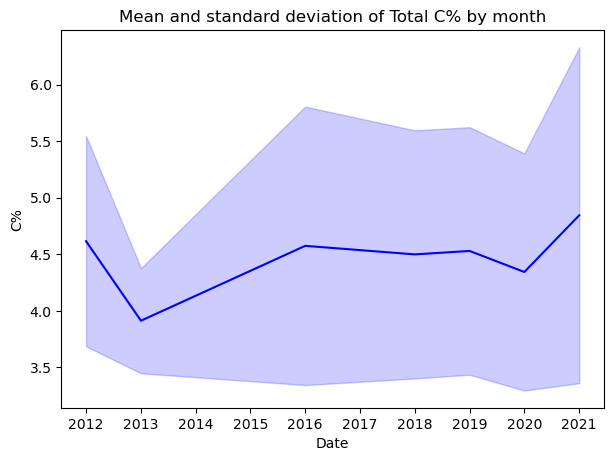

In [130]:
## Plot
plt.figure(figsize=(7, 5), dpi=100)
plt.plot(group_year['Year'], group_year['mean'], color = 'blue')
plt.fill_between(group_year['Year'], (group_year['mean']+group_year['std']), 
                 (group_year['mean']-group_year['std']), alpha = 0.2, color = 'blue')
plt.title("Mean and standard deviation of Total C% by month")
plt.xlabel("Date")
plt.ylabel("C%")
plt.savefig('average_C_by_year.png', dpi=300)

plt.show()

In [131]:
diff = group_year['mean'][6] - group_year['mean'][0]
print('The change in C% in nine years was {}%'.format(round(diff,2)))

The change in C% in nine years was 0.23%


In [132]:
diff_month = group_by_month['mean'][22] - group_by_month['mean'][0]
print('The change in C% in nine years was {}%'.format(round(diff,2)))

The change in C% in nine years was 0.23%


In [133]:
files_df.to_csv('dataset_final_date_RR.csv', index = False)

### Save files by month-year

In [134]:
for i in range(len(group_by_month)):
    files = files_df.loc[files_df['Month-year'] == str(group_by_month['Month-year'][i]).split()[0]]
    files.to_csv("files_{}.csv".format(str(group_by_month['Month-year'][i]).split()[0]), index = False)

#### Join datasets with bands

In [224]:
## To open files from computer
f2 = glob.glob('files*RS*csv')
f2

['files_2012_with_RS_2012.csv',
 'files_2013-06-01_with_RS_2013-06-04.csv',
 'files_2016-07-01_with_RS_2016-08-15.csv',
 'files_2018_with_RS_2018.csv',
 'files_2019-01-01_with_RS_2019-03-26.csv',
 'files_2019-03-01_with_RS_2019-03-26.csv',
 'files_2019-06-01_with_RS_2019-03-26.csv',
 'files_2019-09-01_with_RS_2019-09-18.csv',
 'files_2020-01-01_with_RS_2020-01-15.csv',
 'files_2020-09-01_with_RS_2020-09-27.csv',
 'files_2020_with_RS_2020.csv',
 'files_2021-03-01_with_RS_2021-02-27.csv',
 'files_2021-06-01_with_RS_2021-07-21.csv',
 'files_2021-08-01_with_RS_2021-07-21.csv',
 'files_2021-09-01_with_RS_2021-09-07.csv',
 'files_2021-12-01_with_RS_2021-09-07.csv']

In [229]:
# Join all the files
f2_df = pd.DataFrame(pd.concat([pd.read_csv(f, sep=';') for f in f2], axis = 0))
f2_df

In [233]:
f2_df.to_csv("final_dataRR_with_RS.csv", index = False)

In [ ]:
## END